In [1]:
from qutip import mesolve, destroy, basis, tensor, qeye
import numpy as np
import matplotlib.pyplot as plt

We know that the interaction Hamiltonian for the Tavis-Cummings model is defined as follows: 
$\begin{equation}
    H_{I} = \omega_{c} a^{\dag} a + \sum_{n=1}^{N} \left[ {\omega_{E}}_{n} \sigma_{n}^{\dag} \sigma_{n} + g_{n} \left( \sigma_{n}^{\dag} a + a^{\dag} \sigma_{n} \right) \right].
\end{equation}
$ 
We first consider the case where we have one emitter, which is resonant with the cavity (i.e. $\omega_{c} = \omega_{E}$).

Text(0.5, 1.0, '1 atom resonant Jaynes-Cummings model with loss')

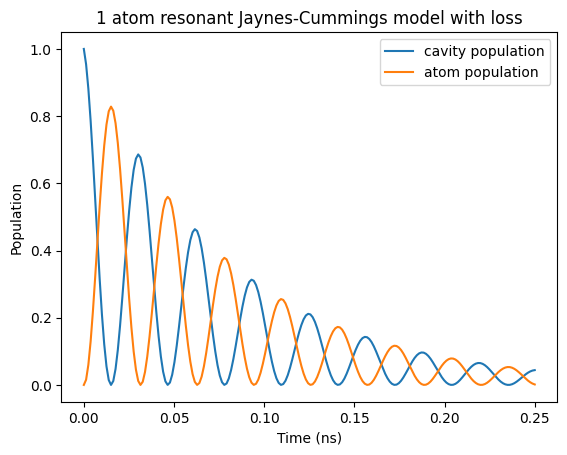

In [35]:
N_photons = 2

a = tensor(destroy(N_photons), qeye(2))
sm = tensor(qeye(N_photons), destroy(2))

# all frequencies in GHz
wc = 245e3  # cavity frequency
wa = 245e3  # atom frequency
g = 100  # coupling
kappa = 245e-1  # cavity loss rate
gamma = 0.4  # atom loss rate

# Lindblad jump operators
c_ops = [np.sqrt(kappa) * a, np.sqrt(gamma) * sm]

H = (
    wc * a.dag() * a
    + wa * sm.dag() * sm
    + g * (a.dag() * sm + a * sm.dag())
)

tlist = np.linspace(0, 0.25, 200)   # simulation times
initial_state = tensor(basis(N_photons, 1), basis(2, 0))

# start off with 1 photon in the cavity, atom in ground state
e_ops = [a.dag() * a, sm.dag() * sm]  # operators to evaluate at each time in the simulation

result = mesolve(H, initial_state, tlist, c_ops, e_ops)  # integrate the Lindbladian

plt.plot(tlist, result.expect[0], label="cavity population")
plt.plot(tlist, result.expect[1], label="atom population")
plt.legend()

plt.xlabel("Time (ns)")
plt.ylabel("Population")
plt.title("1 atom resonant Jaynes-Cummings model with loss")

Next, we consider the case of two emitters, which are resonant with the cavity.

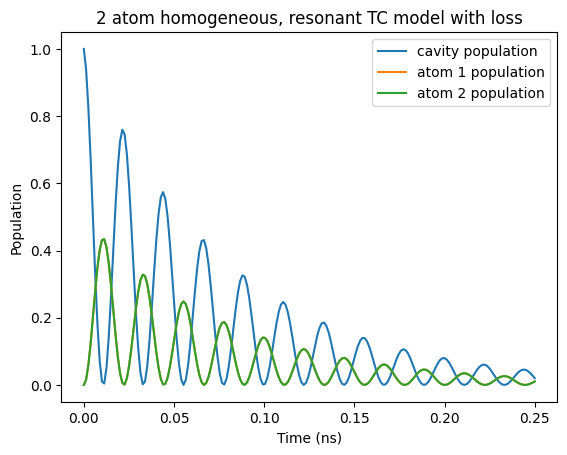

In [52]:
N_photons = 2

a = tensor(destroy(N_photons), qeye(2), qeye(2))
sm1 = tensor(qeye(N_photons), destroy(2), qeye(2))
sm2 = tensor(qeye(N_photons), qeye(2), destroy(2))

# all frequencies in GHz
wc = 245e3  # cavity frequency
wa1 = wa2 = 245e3  # atom frequency
g = 100  # coupling
kappa = 245e-1  # cavity loss rate
gamma = 0.4  # atom loss rate

# Lindblad jump operators
c_ops = [np.sqrt(kappa) * a, np.sqrt(gamma) * sm1 + np.sqrt(gamma) * sm2]

H = (
    wc * a.dag() * a
    + wa1 * sm1.dag() * sm1
    + wa2 * sm2.dag() * sm2
    + g * (a.dag() * sm1 + a * sm1.dag())
    + g * (a.dag() * sm2 + a * sm2.dag())
)

tlist = np.linspace(0, 0.25, 200)   # simulation times

# start off with 1 photon in the cavity, both atoms in ground state
initial_state = tensor(basis(N_photons, 1), basis(2, 0), basis(2, 0))

# operators to evaluate at each time in the simulation
e_ops = [a.dag() * a, sm1.dag() * sm1, sm2.dag() * sm2]

result = mesolve(H, initial_state, tlist, c_ops, e_ops)  # integrate the Lindbladian

plt.plot(tlist, result.expect[0], label="cavity population")
plt.plot(tlist, result.expect[1], label="atom 1 population")
plt.plot(tlist, result.expect[2], label="atom 2 population")
plt.legend()

plt.xlabel("Time (ns)")
plt.ylabel("Population")
plt.title("2 atom homogeneous, resonant TC model with loss")
plt.show()

We next consider the case where we have two emitters, which are non-resonant with the cavity, but whose respective frequencies are equal (it's homogeneous), (i.e. ${\omega_{E}}_{1} = {\omega_{E}}_{2} \neq \omega_{c}$).

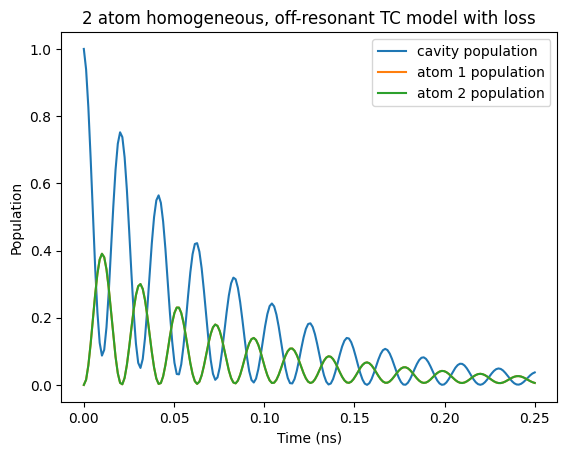

In [50]:
N_photons = 2

a = tensor(destroy(N_photons), qeye(2), qeye(2))
sm1 = tensor(qeye(N_photons), destroy(2), qeye(2))
sm2 = tensor(qeye(N_photons), qeye(2), destroy(2))

# all frequencies in GHz
wc = 245e3  # cavity frequency
wa1 = wa2 = 245.1e3  # atom frequency
g = 100  # coupling
kappa = 245e-1  # cavity loss rate
gamma = 0.4  # atom loss rate

# Lindblad jump operators
c_ops = [np.sqrt(kappa) * a, np.sqrt(gamma) * sm1 + np.sqrt(gamma) * sm2]

H = (
    wc * a.dag() * a
    + wa * sm1.dag() * sm1
    + wa * sm2.dag() * sm2
    + g * (a.dag() * sm1 + a * sm1.dag())
    + g * (a.dag() * sm2 + a * sm2.dag())
)

tlist = np.linspace(0, 0.25, 200)   # simulation times

# start off with 1 photon in the cavity, both atoms in ground state
initial_state = tensor(basis(N_photons, 1), basis(2, 0), basis(2, 0))

# operators to evaluate at each time in the simulation
e_ops = [a.dag() * a, sm1.dag() * sm1, sm2.dag() * sm2]

result = mesolve(H, initial_state, tlist, c_ops, e_ops)  # integrate the Lindbladian

plt.plot(tlist, result.expect[0], label="cavity population")
plt.plot(tlist, result.expect[1], label="atom 1 population")
plt.plot(tlist, result.expect[2], label="atom 2 population")
plt.legend()

plt.xlabel("Time (ns)")
plt.ylabel("Population")
plt.title("2 atom homogeneous, off-resonant TC model with loss")
plt.show()

Finally, we consider the case where we have two emitters, which are non-resonant both with the cavity and each other (inhomogeneous) (i.e. ${\omega_{c} \neq \omega_{E}}_{1} \neq {\omega_{E}}_{2} \neq \omega_{c}$).

Text(0.5, 1.0, '2 atom inhomogeneous, off-resonant TC model with loss')

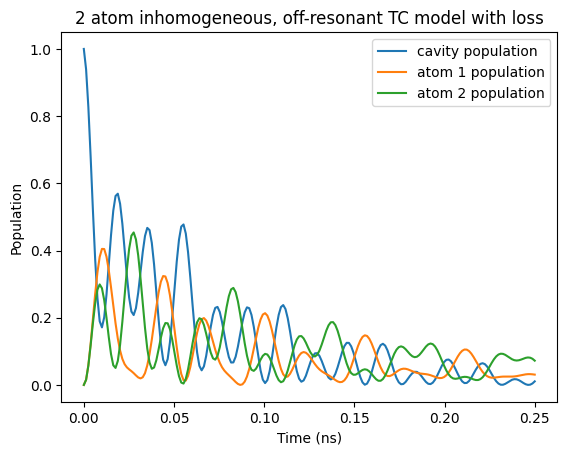

In [44]:
N_photons = 2

a = tensor(destroy(N_photons), qeye(2), qeye(2))
sm1 = tensor(qeye(N_photons), destroy(2), qeye(2))
sm2 = tensor(qeye(N_photons), qeye(2), destroy(2))

# all frequencies in GHz
wc = 245e3  # cavity frequency
wa1 = 245.1e3  # atom 1 frequency
wa2 = 245.2e3  # atom 2 frequency
g = 100  # coupling
kappa = 245e-1  # cavity loss rate
gamma = 0.4  # atom loss rate

# Lindblad jump operators
c_ops = [np.sqrt(kappa) * a, np.sqrt(gamma) * sm1, np.sqrt(gamma) * sm2]

H = (
    wc * a.dag() * a
    + wa1 * sm1.dag() * sm1
    + wa2 * sm2.dag() * sm2
    + g * (a.dag() * sm1 + a * sm1.dag())
    + g * (a.dag() * sm2 + a * sm2.dag())
)

tlist = np.linspace(0, 0.25, 200)   # simulation times

# start off with 1 photon in the cavity, both atoms in ground state
initial_state = tensor(basis(N_photons, 1), basis(2, 0), basis(2, 0))

# operators to evaluate at each time in the simulation
e_ops = [a.dag() * a, sm1.dag() * sm1, sm2.dag() * sm2]

result = mesolve(H, initial_state, tlist, c_ops, e_ops)  # integrate the Lindbladian

plt.plot(tlist, result.expect[0], label="cavity population")
plt.plot(tlist, result.expect[1], label="atom 1 population")
plt.plot(tlist, result.expect[2], label="atom 2 population")
plt.legend()

plt.xlabel("Time (ns)")
plt.ylabel("Population")
plt.title("2 atom inhomogeneous, off-resonant TC model with loss")
plt.show()

## New plots

Now we consider 3 emitters of different frequencies (inhomogeneous, off-resonant)

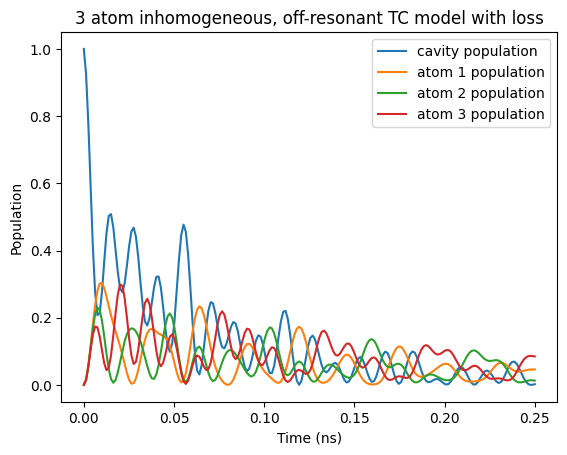

In [49]:
N_photons = 2

a = tensor(destroy(N_photons), qeye(2), qeye(2), qeye(2))
sm1 = tensor(qeye(N_photons), destroy(2), qeye(2), qeye(2))
sm2 = tensor(qeye(N_photons), qeye(2), destroy(2), qeye(2))
sm3 = tensor(qeye(N_photons), qeye(2), qeye(2), destroy(2))

# all frequencies in GHz
wc = 245e3  # cavity frequency
wa1 = 245.1e3  # atom 1 frequency
wa2 = 245.2e3  # atom 2 frequency
wa3 = 245.3e3  # atom 2 frequency
g = 100  # coupling
kappa = 245e-1  # cavity loss rate
gamma = 0.4  # atom loss rate

# Lindblad jump operators
c_ops = [np.sqrt(kappa) * a, np.sqrt(gamma) * sm1, np.sqrt(gamma) * sm2, np.sqrt(gamma) * sm3]

H = (
    wc * a.dag() * a
    + wa1 * sm1.dag() * sm1
    + wa2 * sm2.dag() * sm2
    + wa3 * sm3.dag() * sm3
    + g * (a.dag() * sm1 + a * sm1.dag())
    + g * (a.dag() * sm2 + a * sm2.dag())
    + g * (a.dag() * sm3 + a * sm3.dag())
)

tlist = np.linspace(0, 0.25, 200)   # simulation times

# start off with 1 photon in the cavity, all 3 atoms in ground state
initial_state = tensor(basis(N_photons, 1), basis(2, 0), basis(2, 0), basis(2, 0))

# operators to evaluate at each time in the simulation
e_ops = [a.dag() * a, sm1.dag() * sm1, sm2.dag() * sm2, sm3.dag() * sm3]

result = mesolve(H, initial_state, tlist, c_ops, e_ops)  # integrate the Lindbladian

plt.plot(tlist, result.expect[0], label="cavity population")
plt.plot(tlist, result.expect[1], label="atom 1 population")
plt.plot(tlist, result.expect[2], label="atom 2 population")
plt.plot(tlist, result.expect[3], label="atom 3 population")
plt.legend()

plt.xlabel("Time (ns)")
plt.ylabel("Population")
plt.title("3 atom inhomogeneous, off-resonant TC model with loss")
plt.show()

Now consider a lossy Jaynes-Cummings model (1 emitter in 1 cavity), which is off-resonant and starts with 2 photons in the cavity

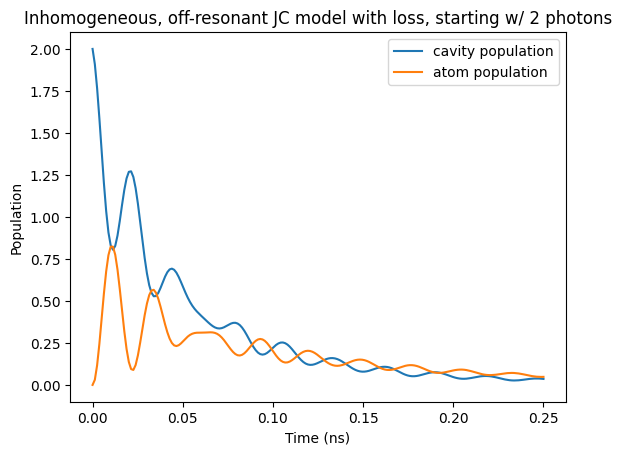

In [56]:
N_photons = 3

a = tensor(destroy(N_photons), qeye(2))
sm = tensor(qeye(N_photons), destroy(2))

# all frequencies in GHz
wc = 245e3  # cavity frequency
wa = 245.1e3  # atom frequency
g = 100  # coupling
kappa = 245e-1  # cavity loss rate
gamma = 0.4  # atom loss rate

# Lindblad jump operators
c_ops = [np.sqrt(kappa) * a, np.sqrt(gamma) * sm]

H = (
    wc * a.dag() * a
    + wa * sm.dag() * sm
    + g * (a.dag() * sm + a * sm.dag())
)

tlist = np.linspace(0, 0.25, 200)   # simulation times

# start off with 2 photons in the cavity, atom in ground state
initial_state = tensor(basis(N_photons, 2), basis(2, 0))

# operators to evaluate at each time in the simulation
e_ops = [a.dag() * a, sm.dag() * sm]

result = mesolve(H, initial_state, tlist, c_ops, e_ops)  # integrate the Lindbladian

plt.plot(tlist, result.expect[0], label="cavity population")
plt.plot(tlist, result.expect[1], label="atom population")
plt.legend()

plt.xlabel("Time (ns)")
plt.ylabel("Population")
plt.title("Inhomogeneous, off-resonant JC model with loss, starting w/ 2 photons")
plt.show()

Same as above, but resonant (lossy resonant JC model starting with 2 cavity photons)

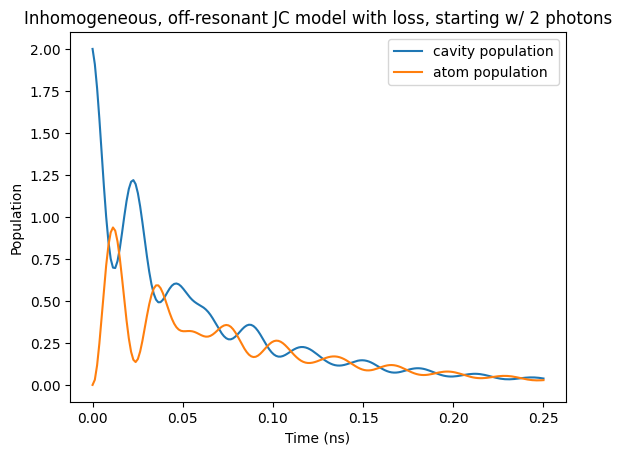

In [62]:
N_photons = 3

a = tensor(destroy(N_photons), qeye(2))
sm = tensor(qeye(N_photons), destroy(2))

# all frequencies in GHz
wc = 245e3  # cavity frequency
wa = 245e3  # atom frequency
g = 100  # coupling
kappa = 245e-1  # cavity loss rate
gamma = 0.4  # atom loss rate

# Lindblad jump operators
c_ops = [np.sqrt(kappa) * a, np.sqrt(gamma) * sm]

H = (
    wc * a.dag() * a
    + wa * sm.dag() * sm
    + g * (a.dag() * sm + a * sm.dag())
)

tlist = np.linspace(0, 0.25, 200)   # simulation times

# start off with 2 photons in the cavity, atom in ground state
initial_state = tensor(basis(N_photons, 2), basis(2, 0))

# operators to evaluate at each time in the simulation
e_ops = [a.dag() * a, sm.dag() * sm]

result = mesolve(H, initial_state, tlist, c_ops, e_ops)  # integrate the Lindbladian

plt.plot(tlist, result.expect[0], label="cavity population")
plt.plot(tlist, result.expect[1], label="atom population")
plt.legend()

plt.xlabel("Time (ns)")
plt.ylabel("Population")
plt.title("Inhomogeneous, off-resonant JC model with loss, starting w/ 2 photons")
plt.show()

### Rabi frequency

#### Jaynes-Cummings (single-emitter in cavity)
In general, if there are $n$ photons in the cavity, and $\delta=\omega_c-\omega_a$ is the detuning between cavity and atom, then excitations will be exchanged back and forth between the atom(s) at the Rabi frequency:

$ \Omega_n = \sqrt{4g^2(n+1) + \delta^2}$

#### Tavis-Cummings
If there are $N$ emitters in the cavity, and the system is resonant ($\delta=0$) and homogeneous ($\omega_{a1}=\omega_{a2}=\cdots=\omega_{aN}$), then in the single-excitation regime, the Rabi rate is

$ \Omega = \sqrt{N} g$